<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-25/Ycut3rdsample_gating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px


# 1. Set up project in runtime
Create colab secrets for the following credentials for the repo to get runtime files and clone repo

In [ ]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1105, done.
remote: Counting objects: 100% (395/395), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 1105 (delta 250), reused 274 (delta 175), pack-reused 710
Receiving objects: 100% (1105/1105), 64.98 MiB | 22.22 MiB/s, done.
Resolving deltas: 100% (619/619), done.
Updating files: 100% (147/147), done.


'/content'

### 24-07-24 LiTaO3 Ycut gating

Gate voltage parameters :
- Amp : 1Vpp
- Offset : 500 mV
- Duty Cycle : 75% and then 10%

Trying to tap off the gating electrode



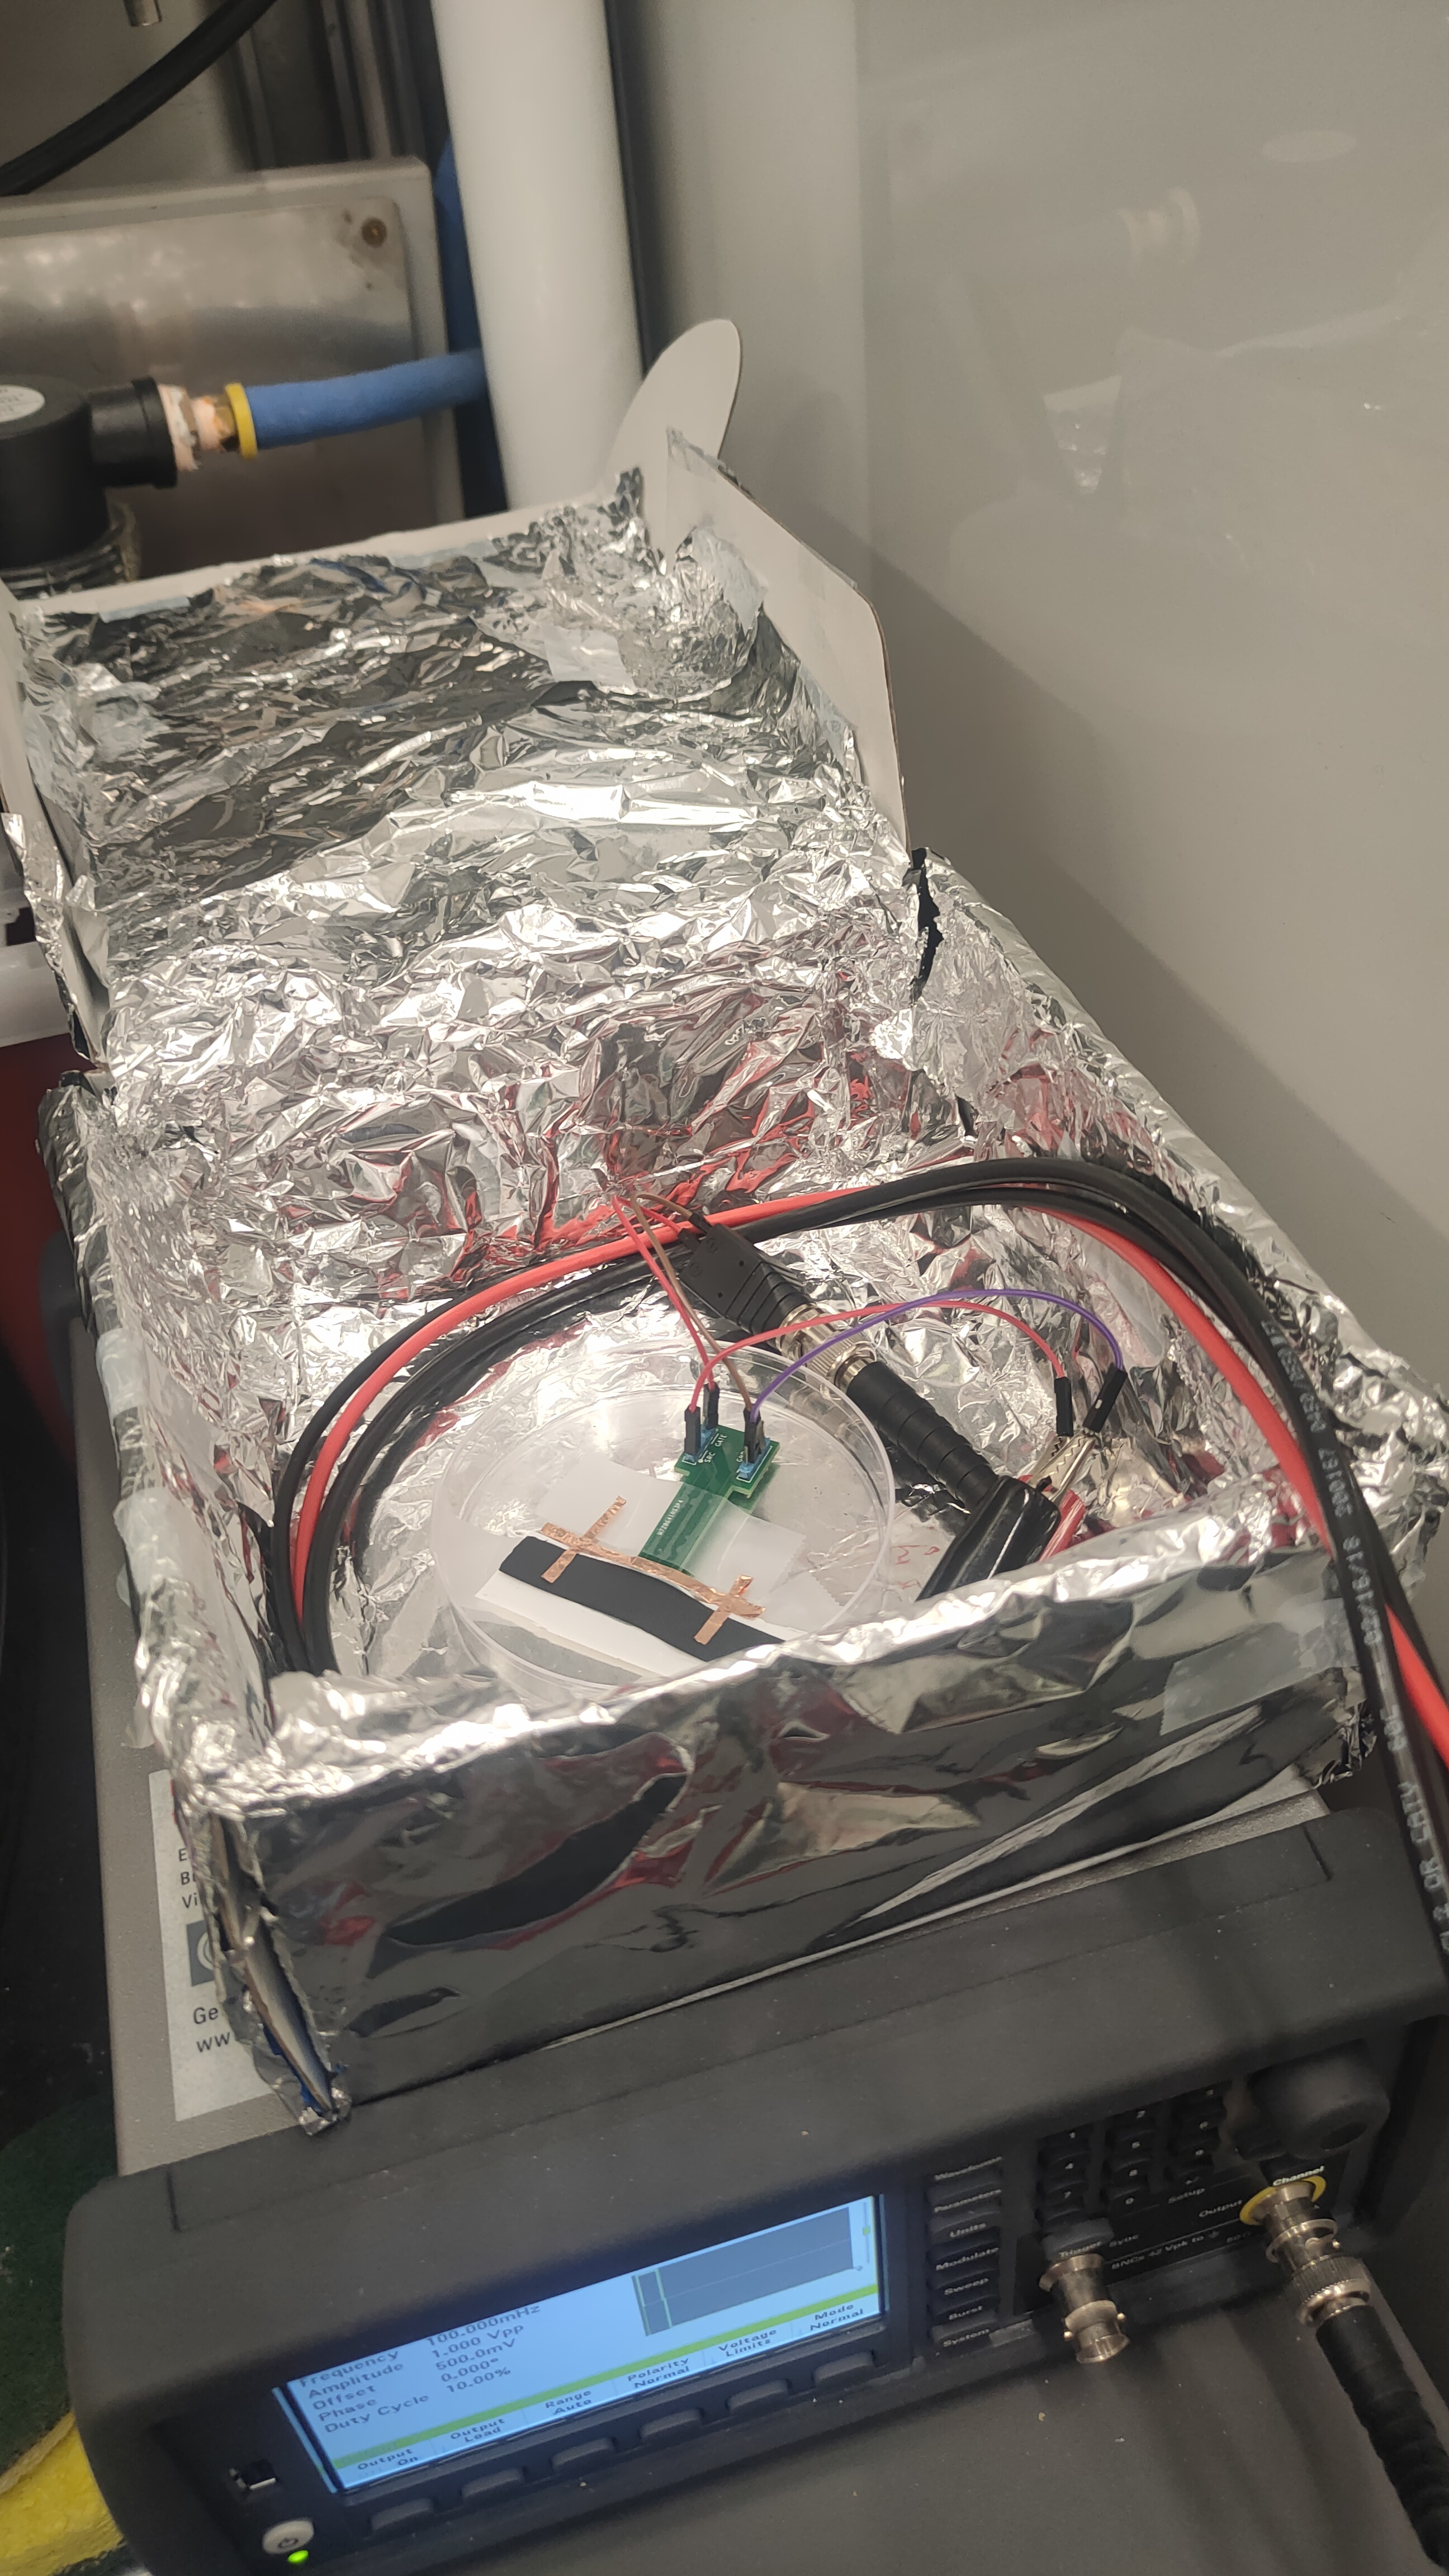

In [ ]:
%cd "/content/gator/data/07-24/"

/content/gator/data/07-24


In [ ]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

In [ ]:
prep_csv('defbuffer1_0724_150045.csv')
df = pd.read_csv('defbuffer1_0724_150045.csv')


Fill Mode,1



In [ ]:
df

,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,Limit2 Low,...,Questionable,Origin,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Relative Time
0,1.994327e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999975,Volt DC,1,T,2W,F,F,0.000000
1,2.002270e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999974,Volt DC,1,T,2W,F,F,0.069325
2,1.999335e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999975,Volt DC,1,T,2W,F,F,0.138636
3,2.000348e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999975,Volt DC,1,T,2W,F,F,0.207955
4,1.999627e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999975,Volt DC,1,T,2W,F,F,0.277261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12036,1.390244e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999977,Volt DC,1,T,2W,F,F,836.671290
12037,1.389367e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999976,Volt DC,1,T,2W,F,F,836.740630
12038,1.389309e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999977,Volt DC,1,T,2W,F,F,836.809959
12039,1.392751e-07,Amp DC,0.000001,5.5,F,F,F,F,F,F,...,F,Main,0.999978,Volt DC,1,T,2W,F,F,836.879294


In [ ]:
# Time (s)
T = df['Relative Time']

# Current (nA)
I = df['Reading'] * 1e9

# Potential (mV)
V = df['Value'] * 1e3

Text(0.5, 0, 'Time (s)')

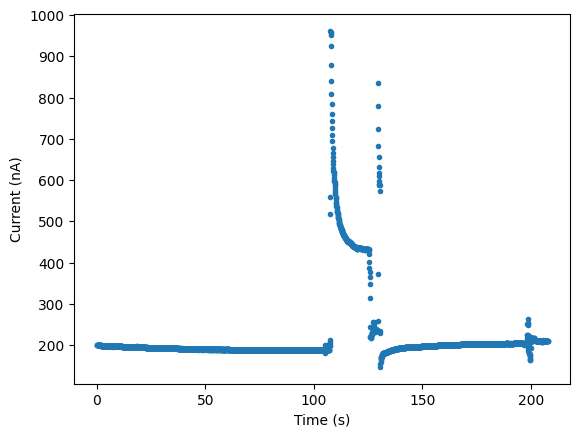

In [ ]:
cut1 = 0
cut2 = 3000
plt.plot(T[cut1:cut2],I[cut1:cut2],'.')
plt.ylabel('Current (nA)')
plt.xlabel('Time (s)')

We can see a sudden increase in conductivity when I tried to tap the gating electrode, which ended up in an increase in conductivity, before it dropped again

No periodicity

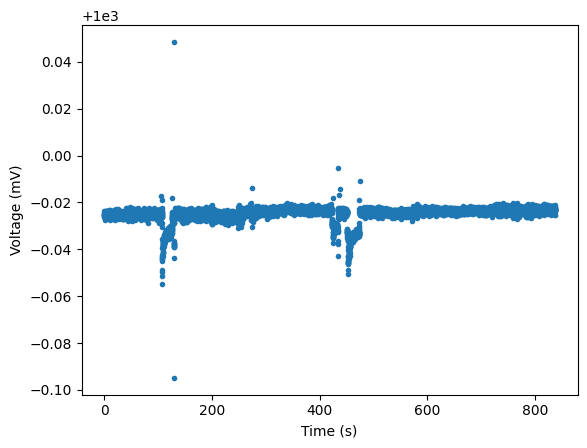

In [ ]:
cut1 = 0
cut2 = None  # Set to None to include the entire array
plt.plot(T[cut1:cut2], V[cut1:cut2], '.')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (s)')
plt.show()